# 1. Regressive Tennis T-Test

Use a linear regression and statsmodels to run a t-test on whether Federer scores more points than his opponents in the `tennis.csv` dataset.

Give a one-paragraph interpretation of the coefficient, and the meaning of the p-value. 

Also answer the following: should your regression include a constant term? Why or why not? How would it change the interpretation of your coefficient and p-value?

In [128]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns 


In [136]:
# 'Only looking at the constant'-way 

df = pd.read_csv('data/tennis.csv')

# turning True into 0.5, and False into -0.5
replace_map = {True: 0.5, False: -0.5} #to check p-value (since it is testing the constant against 0)
df['win'] = df.win.map(replace_map)
df['win'].unique()

est_const = sm.OLS(df.win,np.ones(len(df.win))).fit()
est_const.summary()

# ANSWERS
#1. Give a one-paragraph interpretation of the coefficient, and the meaning of the p-value.

# In this case, the 'coefficient' that we are looking at is in fact the constant (0.3244, p < .05). This constant is being directly compared to 0 (in terms of the p-value). The p-value is smaller than 0.05, thus indicating that the constant is indeed statistically significantly different to 0. 
# In terms of what the constant (0.3244) is telling us, it is telling us that Federer wins (i.e., scores more points than his opponents) more often than his opponents (and statistically significantly so) because the constant is above 0. A constant of 0 would have meant that there is no difference between Federer's number of wins and loses, and a constant below 0 would have meant that Federer loses more often than he wins. 


#2. Also answer the following: should your regression include a constant term? Why or why not? How would it change the interpretation of your coefficient and p-value?

# In this case, YES the constant term is what we are looking at. 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    win   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                       nan
Date:                Fri, 15 Jan 2021   Prob (F-statistic):                nan
Time:                        20:16:31   Log-Likelihood:                -533.56
No. Observations:                1179   AIC:                             1069.
Df Residuals:                    1178   BIC:                             1074.
Df Model:                           0                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3244      0.011     29.268      0.000       0.303       0.346
==============================================================================
Omnibus:                      315.184   Durbin-Watson:                   1.969
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              612.100
Skew:                          -1.705   Prob(JB):                    1.21e-133
Kurtosis:                       3.909   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

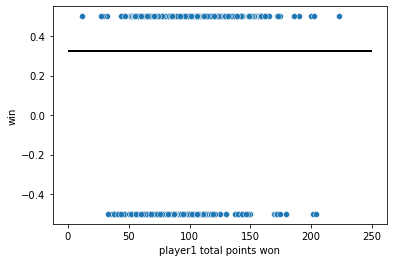

In [143]:
sns.scatterplot(x='player1 total points won', y='win', data=df)
plt.hlines(y=est_const.params, xmin=0, xmax=250, lw=2, color='black')

# As we can see, the intercept is closer to win-True, than win-False. 

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                               
====================================================================================
Dep. Variable:     player2 total points won   R-squared:                       0.794
Model:                                  OLS   Adj. R-squared:                  0.794
Method:                       Least Squares   F-statistic:                     3184.
Date:                      Fri, 15 Jan 2021   Prob (F-statistic):          4.18e-315
Time:                              18:57:10   Log-Likelihood:                -4100.3
No. Observations:                      1016   AIC:                             8205.
Df Residuals:                          1014   BIC:                             8215.
Df Model:                                 1                                         
Covariance Type:                        HC2                                         
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                      -10.2706      1.574     -6.526      0.000     -13.355      -7.186
player1 total points won     0.9681      0.017     56.430      0.000       0.934       1.002
==============================================================================
Omnibus:                       80.698   Durbin-Watson:                   1.635
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               98.295
Skew:                           0.739   Prob(JB):                     4.52e-22
Kurtosis:                       3.367   Cond. No.                         300.
==============================================================================

Warnings:
[1] Standard Errors are heteroscedasticity robust (HC2)
"""

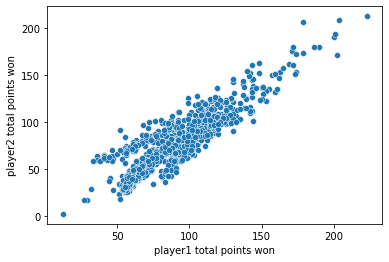

In [74]:
# The 'usual' way:

import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

df = pd.read_csv('data/tennis.csv')

sns.scatterplot(df['player1 total points won'], df['player2 total points won'], data=df)

df = df.dropna()
X = df['player1 total points won']
y = df['player2 total points won']
X = sm.add_constant(X)

est = sm.OLS(y,X).fit(cov_type='HC2')
est.summary()

# ANSWERS
#1. Give a one-paragraph interpretation of the coefficient, and the meaning of the p-value.

# In this case, the 'coefficient' is 0.9681 (p < .05). This is a positive coefficient, but it is below 1. This means that for every point Federer (player 1) scores, player 2 scores 0.9681 points. This also shows that Federer scores more points than his opponents, and statistically significantly so (p < .05). 


#2. Also answer the following: should your regression include a constant term? Why or why not? How would it change the interpretation of your coefficient and p-value?

# If we don't include a constant term, the R-squared gets larger (0.969), and the coeff gets smaller (indicating that as Federer scores a point, his oppoenents actually score even less (coeff = 0.8608, p < .05)). However, the AIC and BIC get larger without a constant... which is no bueno. So this indicates that we should include the constant term. 

# 2. College admissions

Using the `college.csv` dataset, answer the following:

1. Is the relation between `Top10perc` and `Top25perc` best fit using a model with only one variable, or one variable and a polynomial of degree 2? Is a constant term useful? How would you select for the best of these model specifications?

2. Do private schools see more admissions overall? T-test this using a linear regression. Hint: use a binary explanatory variable for `Private`. Explain your model specification choices.


In [76]:
import pandas as pd 

coll_df = pd.read_csv('data/college.csv')
coll_df.head()

,Unnamed: 0,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


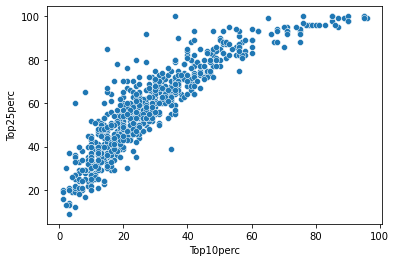

In [75]:
sns.scatterplot(x='Top10perc', y= 'Top25perc', data=coll_df) #at first glance can already see it looks a little polynomial-y (degree 2)

In [88]:
# Fit using one variable (simple linear regression)

X = coll_df['Top10perc']
y = coll_df['Top25perc']
X = sm.add_constant(X)

est = sm.OLS(y,X).fit(cov_type='HC2')
est.summary()

# Without constant:
# AIC: 6667
# BIC: 6671
# log-likelihood: -3332.4

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Top25perc   R-squared:                       0.796
Model:                            OLS   Adj. R-squared:                  0.795
Method:                 Least Squares   F-statistic:                     1557.
Date:                Fri, 15 Jan 2021   Prob (F-statistic):          1.42e-187
Time:                        19:10:24   Log-Likelihood:                -2805.2
No. Observations:                 777   AIC:                             5614.
Df Residuals:                     775   BIC:                             5624.
Df Model:                           1                                         
Covariance Type:                  HC2                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         28.1984      0.746     37.785      0.000      26.736      29.661
Top10perc      1.0014      0.025     39.459      0.000       0.952       1.051
==============================================================================
Omnibus:                       45.943   Durbin-Watson:                   1.920
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               85.462
Skew:                           0.401   Prob(JB):                     2.77e-19
Kurtosis:                       4.413   Cond. No.                         60.8
==============================================================================

Warnings:
[1] Standard Errors are heteroscedasticity robust (HC2)
"""

In [90]:
# Fit using one variable and a polynomial of degree 2 (Top 10 perc)

X = coll_df['Top10perc']
y = coll_df['Top25perc']

X_sq = X.apply(np.square)
# X_sq = X_sq.rename(columns = {'Top10perc': 'Top10perc_sq'})

new_df = pd.concat((X, X_sq), axis=1)
new_df["constant"] = 1

est = sm.OLS(y,new_df).fit()
est.summary()

# Without constant:
# AIC: 5683
# BIC: 5692
# log-likelihood: -2839.4

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Top25perc   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.851
Method:                 Least Squares   F-statistic:                     2220.
Date:                Fri, 15 Jan 2021   Prob (F-statistic):          2.50e-321
Time:                        19:10:41   Log-Likelihood:                -2681.0
No. Observations:                 777   AIC:                             5368.
Df Residuals:                     774   BIC:                             5382.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Top10perc      1.8140      0.050     36.229      0.000       1.716       1.912
Top10perc     -0.0102      0.001    -17.072      0.000      -0.011      -0.009
constant      16.6786      0.845     19.738      0.000      15.020      18.337
==============================================================================
Omnibus:                      177.730   Durbin-Watson:                   1.960
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              570.823
Skew:                           1.089   Prob(JB):                    1.12e-124
Kurtosis:                       6.590   Cond. No.                     5.65e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.65e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [91]:
# Fit using one variable and a polynomial of degree 2 (Top 25 perc)

X = coll_df['Top10perc']
y = coll_df['Top25perc']

y_sq = y.apply(np.square)
# X_sq = X_sq.rename(columns = {'Top10perc': 'Top10perc_sq'})

new_df = pd.concat((y, y_sq), axis=1)
new_df["constant"] = 1

est = sm.OLS(X,new_df).fit()
est.summary()

# Without constant:
# AIC: 5206
# BIC: 5215
# log-likelihood: -2600.9

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Top10perc   R-squared:                       0.856
Model:                            OLS   Adj. R-squared:                  0.856
Method:                 Least Squares   F-statistic:                     2305.
Date:                Fri, 15 Jan 2021   Prob (F-statistic):               0.00
Time:                        19:10:47   Log-Likelihood:                -2578.5
No. Observations:                 777   AIC:                             5163.
Df Residuals:                     774   BIC:                             5177.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Top25perc     -0.3124      0.062     -5.002      0.000      -0.435      -0.190
Top25perc      0.0095      0.001     18.066      0.000       0.008       0.011
constant      11.7490      1.735      6.773      0.000       8.344      15.154
==============================================================================
Omnibus:                      184.094   Durbin-Watson:                   2.023
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              954.340
Skew:                          -0.970   Prob(JB):                    5.86e-208
Kurtosis:                       8.071   Cond. No.                     3.05e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.05e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
# 1. Is the relation between Top10perc and Top25perc best fit using a model with only one variable, or one variable and a polynomial of degree 2? Is a constant term useful? How would you select for the best of these model specifications?

#The best fit seems to be using polynomial regression of degree 2 with Top25perc as the predictor. 
#Is the constant term useful? Yes, including it gives us the best fit. 
# ** It is important to note that even though when using one variable and a polynomial to the degree 2, AIC and BIC are lowest, the R2 is highest, and both coefficients and the constant are statistically significant, the condition number blows up, indicating severe multicollinearity. 


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Accept   R-squared:                       0.226
Model:                            OLS   Adj. R-squared:                  0.225
Method:                 Least Squares   F-statistic:                     113.2
Date:                Fri, 15 Jan 2021   Prob (F-statistic):           9.15e-25
Time:                        19:22:49   Log-Likelihood:                -7066.5
No. Observations:                 777   AIC:                         1.414e+04
Df Residuals:                     775   BIC:                         1.415e+04
Df Model:                           1                                         
Covariance Type:                  HC2                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       3919.2877    238.820     16.411      0.000    3451.210    4387.366
Private    -2613.5851    245.672    -10.639      0.000   -3095.093   -2132.077
==============================================================================
Omnibus:                      603.909   Durbin-Watson:                   1.890
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            15927.055
Skew:                           3.268   Prob(JB):                         0.00
Kurtosis:                      24.195   Cond. No.                         3.60
==============================================================================

Warnings:
[1] Standard Errors are heteroscedasticity robust (HC2)
"""

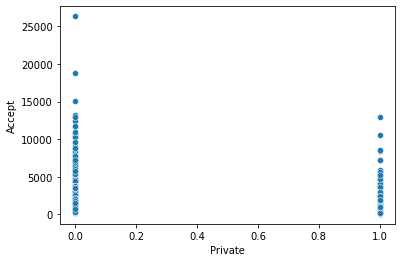

In [99]:
# 2. Do private schools see more admissions overall? T-test this using a linear regression. Hint: use a binary explanatory variable for Private. Explain your model specification choices.
coll_df = pd.read_csv('data/college.csv')

replace_map = {'Yes': 1, 'No': 0} #to check p-value (since it is testing the constant against 0)
coll_df['Private'] = coll_df.Private.map(replace_map)

X = coll_df['Private']
y = coll_df['Accept']
X = sm.add_constant(X)


sns.scatterplot(x='Private', y= 'Accept', data=coll_df)

est = sm.OLS(y,X).fit(cov_type='HC2')
est.summary()


# ANSWER
# No, private schools do not see more admissions overall. This is shown in the t-test of admissions ('accept') vs private school (yes or no). The coeff is -2613.5851 indicating that as we go from public school to private school (from 0 to 1), the number of admissions is -2613 for private schools than it is for public schools. 

# 3. Auto prediction

Using the `auto.csv` dataset, perform a simple linear regression with `mpg` as the response variable and horsepower as the predictor. Answer the following:

 i. Is there a relationship between the predictor and the response?
 
 ii. How strong is the relationship between the predictor and the response?
 
 iii. Is the relationship between the predictor and the response positive or negative?

 iv. What is the predicted mpg associated with a horsepower of 98? What are the associated 95 % confidence and prediction intervals ?

 v. Make a regression plot the response and the predictor.

In [36]:
import pandas as pd 

df_auto = pd.read_csv('data/auto.csv', delim_whitespace=True)
df_auto.columns
df_auto.dropna(inplace=True)
df_auto = df_auto.drop(df_auto.index[df_auto.horsepower == '?']) #Remove '?' from horsepower
df_auto.horsepower = df_auto.horsepower.astype(float) #Converting to float
df_auto.mpg = df_auto.mpg.astype(float) #Converting to float
df_auto.head(3)

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
1,18.0,8.0,307.0,130.0,3504.0,12.0,70.0,1.0,chevrolet chevelle malibu
2,15.0,8.0,350.0,165.0,3693.0,11.5,70.0,1.0,buick skylark 320
3,18.0,8.0,318.0,150.0,3436.0,11.0,70.0,1.0,plymouth satellite


In [106]:
# Perform a simple linear regression with mpg as the response variable and horsepower as the predictor.

X = df_auto['horsepower']
y = df_auto['mpg']
X = sm.add_constant(X)

est = sm.OLS(y,X).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     599.7
Date:                Fri, 15 Jan 2021   Prob (F-statistic):           7.03e-81
Time:                        19:26:43   Log-Likelihood:                -1178.7
No. Observations:                 392   AIC:                             2361.
Df Residuals:                     390   BIC:                             2369.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         39.9359      0.717     55.660      0.000      38.525      41.347
horsepower    -0.1578      0.006    -24.489      0.000      -0.171      -0.145
==============================================================================
Omnibus:                       16.432   Durbin-Watson:                   0.920
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               17.305
Skew:                           0.492   Prob(JB):                     0.000175
Kurtosis:                       3.299   Cond. No.                         322.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
### i. Is there a relationship between the predictor and the response?

# Yes 


### ii. How strong is the relationship between the predictor and the response?

# There is a med-strength correlation (R2 = 0.606) between horsepower and mpg. 


### iii. Is the relationship between the predictor and the response positive or negative?

# The relationship is (slightly) negative. As one increases, the other decreases. As horsepower increases by 1, mpg decreases by 0.1578. 


In [110]:
### iv. What is the predicted mpg associated with a horsepower of 98? What are the associated 95 % confidence and prediction intervals ?

x = -0.1578 * (98) + 39.9359
print(f"Predicted mpd associated with horsepower of 98 is {x} mpg.\n\n")

print(f'The associated 95% confidence and prediction intervals are: \n[38.525 , 41.347] for the y-intercept and, \n[-0.171, -0.145] for the slope.')

Predicted mpd associated with horsepower of 98 is 24.4715 mpg.


The associated 95% confidence and prediction intervals are: 
[38.525 , 41.347] for the y-intercept and, 
[-0.171, -0.145] for the slope.


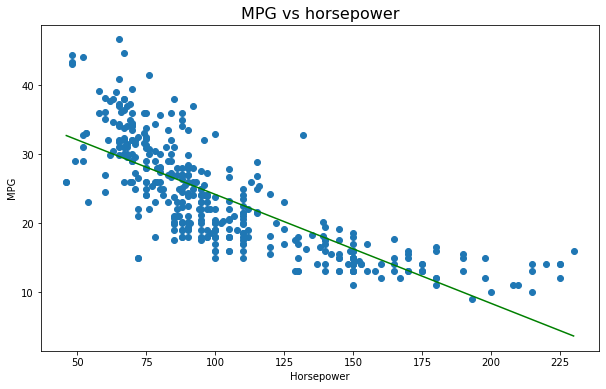

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     599.7
Date:                Fri, 15 Jan 2021   Prob (F-statistic):           7.03e-81
Time:                        19:34:04   Log-Likelihood:                -1178.7
No. Observations:                 392   AIC:                             2361.
Df Residuals:                     390   BIC:                             2369.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         39.9359      0.717     55.660      0.000      38.525      41.347
horsepower    -0.1578      0.006    -24.489      0.000      -0.171      -0.145
==============================================================================
Omnibus:                       16.432   Durbin-Watson:                   0.920
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               17.305
Skew:                           0.492   Prob(JB):                     0.000175
Kurtosis:                       3.299   Cond. No.                         322.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [112]:
### v. Make a regression plot the response and the predictor.

X = df_auto['horsepower']
y = df_auto['mpg']
# y = np.array(y)
X = sm.add_constant(X)
# X = np.array(X)


est = sm.OLS(y,X).fit()
# est.summary()

bmin, bmax = df_auto.horsepower.min(), df_auto.horsepower.max()
xfit = sm.add_constant(np.linspace(bmin, bmax, len(df_auto)))
yfit = est.predict(xfit)

fig, ax = plt.subplots(figsize=(10,6))
plt.scatter(df_auto['horsepower'], y, )
plt.plot(xfit[:,1], yfit, 'green')
plt.title('MPG vs horsepower', size= 16)
plt.xlabel('Horsepower')
plt.ylabel('MPG')
plt.show()

est.summary()


# 4. Auto Multiple Regression

Perform a multiple linear regression with `mpg` as the response and all other variables except name in `auto` as the predictors. Comment on the output:

i. Is there a relationship between the predictors and the response?

ii. Which predictors appear to have a statistically significant relationship to the response?

iii. What does the coefficient for the year variable suggest?

iv. Comment on any problems you see with the fit. Do the residual plots suggest any unusually large outliers?

v. Is there heteroscedasticity in the fit?

In [145]:
X = df_auto.drop(['mpg', 'name'], axis=1)
y = df_auto['mpg']

X = sm.add_constant(X)

est = sm.OLS(y,X).fit() #model
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     252.4
Date:                Fri, 15 Jan 2021   Prob (F-statistic):          2.04e-139
Time:                        21:19:10   Log-Likelihood:                -1023.5
No. Observations:                 392   AIC:                             2063.
Df Residuals:                     384   BIC:                             2095.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          -17.2184      4.644     -3.707      0.000     -26.350      -8.087
cylinders       -0.4934      0.323     -1.526      0.128      -1.129       0.142
displacement     0.0199      0.008      2.647      0.008       0.005       0.035
horsepower      -0.0170      0.014     -1.230      0.220      -0.044       0.010
weight          -0.0065      0.001     -9.929      0.000      -0.008      -0.005
acceleration     0.0806      0.099      0.815      0.415      -0.114       0.275
year             0.7508      0.051     14.729      0.000       0.651       0.851
origin           1.4261      0.278      5.127      0.000       0.879       1.973
==============================================================================
Omnibus:                       31.906   Durbin-Watson:                   1.309
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               53.100
Skew:                           0.529   Prob(JB):                     2.95e-12
Kurtosis:                       4.460   Cond. No.                     8.59e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.59e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
### i. Is there a relationship between the predictors and the response?

# Yes, F-stat = 252.4, p < 0.05

In [ ]:
### ii. Which predictors appear to have a statistically significant relationship to the response?

# There is a relationship between: displacement and mpg, weight and mpg, year and mpg, and origin and mpg. 

In [ ]:
### iii. What does the coefficient for the year variable suggest?

# The coeff for the year variable (0.7508) suggests that with cars made 1 year later, mpg increases by 0.7508 miles per gallons. 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     252.4
Date:                Fri, 15 Jan 2021   Prob (F-statistic):          2.04e-139
Time:                        21:19:14   Log-Likelihood:                -1023.5
No. Observations:                 392   AIC:                             2063.
Df Residuals:                     384   BIC:                             2095.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          -17.2184      4.644     -3.707      0.000     -26.350      -8.087
cylinders       -0.4934      0.323     -1.526      0.128      -1.129       0.142
displacement     0.0199      0.008      2.647      0.008       0.005       0.035
horsepower      -0.0170      0.014     -1.230      0.220      -0.044       0.010
weight          -0.0065      0.001     -9.929      0.000      -0.008      -0.005
acceleration     0.0806      0.099      0.815      0.415      -0.114       0.275
year             0.7508      0.051     14.729      0.000       0.651       0.851
origin           1.4261      0.278      5.127      0.000       0.879       1.973
==============================================================================
Omnibus:                       31.906   Durbin-Watson:                   1.309
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               53.100
Skew:                           0.529   Prob(JB):                     2.95e-12
Kurtosis:                       4.460   Cond. No.                     8.59e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.59e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

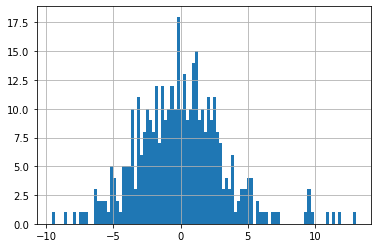

In [146]:
### iv. Comment on any problems you see with the fit. Do the residual plots suggest any unusually large outliers?

est.resid.hist(bins=100)
est.summary()

# The histogram of residuals looks pretty Gaussian (which is a good sign). As one of the 7 (aka 5) assumptions says: "we expect a normal distribution in the regression error term." This histogram shows a distribution that is quite normal. Prehaps just a few outliers above 10 on the x-axis. 

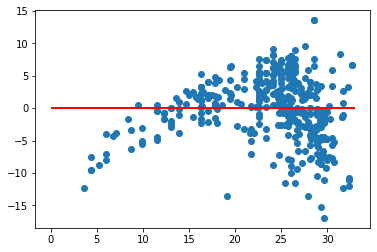

In [125]:
# Residual plot: 
y_pred = est.predict(X)
plt.hlines(y=0, xmin=0, xmax=33, lw=2, color='red')
plt.scatter(y_pred, y_pred-y)

# However, there does seem to be a bit of a shape in this residual plot. Indicating that our model is unable to capture some explanatory information, which is leaked into the residuals. 

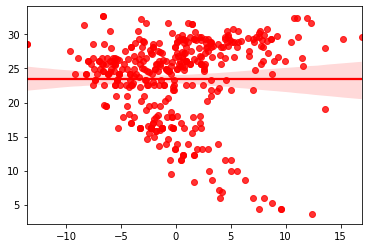

In [126]:
# Can also use sns.regplot 

residual = y - y_pred
sns.regplot(x = residual, y = y_pred, data = None, scatter = True, color = 'red')


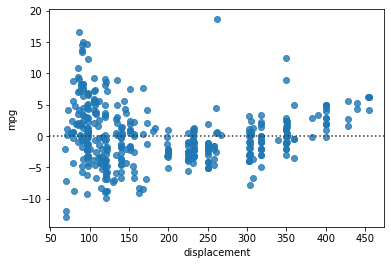

In [53]:
# Can use .residplot for looking at the residuals of feature at a time. 

sns.residplot(x='displacement', y='mpg', data=df_auto)

# For displacement, perhaps there are a few outliers in the data. They should all be clustered and randomly distributed around the hline = 0. 

In [148]:
### v. Is there heteroscedasticity in the fit?

# A Breusch-Pagan test uses the following null and alternative hypotheses:
# The null hypothesis (H0): Homoscedasticity is present.
# The alternative hypothesis: (Ha): Homoscedasticity is not present (i.e. heteroscedasticity exists)

from statsmodels.compat import lzip
import statsmodels.stats.api as sms

X = df_auto.drop(['mpg', 'name'], axis=1)
y = df_auto['mpg']

X = sm.add_constant(X)

est = sm.OLS(y,X).fit(cov_type='HC2') #model
est.summary()

#perform Bresuch-Pagan test
names = ['Lagrange multiplier statistic', 'p-value',
        'f-value', 'f p-value']
test = sms.het_breuschpagan(est.resid, est.model.exog)

lzip(names, test)

# We obtain a p-value of 0.000118. A p-value of < .05 indicates that there IS heteroscedasticity in this model. Thus we reject the null hypothesis that homoscedasticity is present. 

[('Lagrange multiplier statistic', 29.476202401177794),
 ('p-value', 0.00011843243739098389),
 ('f-value', 4.46034234639917),
 ('f p-value', 8.683259637573443e-05)]

# 5. Car Seats

This question should be answered using the Carseats data set

1. Fit a multiple regression model to predict Sales using Price, Urban, and US.

2. Provide an interpretation of each coefficient in the model. Be careful—some of the variables in the model are qualitative!

3. For which of the predictors can you reject the null hypothesis H0 : βj = 0?

4. On the basis of your response to the previous question, fit a smaller model that only uses the predictors for which there is evidence of association with the outcome.

5. How well do the models in 1 and 4 fit the data? Explain which statistics show the difference.

6. Using the model from (e), obtain 95 % confidence intervals for the coefficient(s).

In [127]:
### 1. Fit a multiple regression model to predict Sales using Price, Urban, and US.

df_carseats = pd.read_csv('data/carseats.csv')
df_carseats.head()

# turning yes into 1, and no into 0
df_carseats['Urban'] = df_carseats['Urban'].map({'Yes': 1, 'No': 0})
df_carseats['US'] = df_carseats['US'].map({'Yes': 1, 'No': 0})

X = df_carseats[['Price', 'Urban', 'US']]
y = df_carseats['Sales']

X = sm.add_constant(X)

est = sm.OLS(y,X).fit(cov_type='HC2') #model
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.239
Model:                            OLS   Adj. R-squared:                  0.234
Method:                 Least Squares   F-statistic:                     43.09
Date:                Fri, 15 Jan 2021   Prob (F-statistic):           4.04e-24
Time:                        20:03:57   Log-Likelihood:                -927.66
No. Observations:                 400   AIC:                             1863.
Df Residuals:                     396   BIC:                             1879.
Df Model:                           3                                         
Covariance Type:                  HC2                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         13.0435      0.641     20.333      0.000      11.786      14.301
Price         -0.0545      0.005    -10.515      0.000      -0.065      -0.044
Urban         -0.0219      0.258     -0.085      0.932      -0.527       0.484
US             1.2006      0.246      4.878      0.000       0.718       1.683
==============================================================================
Omnibus:                        0.676   Durbin-Watson:                   1.912
Prob(Omnibus):                  0.713   Jarque-Bera (JB):                0.758
Skew:                           0.093   Prob(JB):                        0.684
Kurtosis:                       2.897   Cond. No.                         628.
==============================================================================

Warnings:
[1] Standard Errors are heteroscedasticity robust (HC2)
"""

In [ ]:
### 2. Provide an interpretation of each coefficient in the model. Be careful—some of the variables in the model are qualitative!

# The constant (y-intercept) is 13.0435, meaning even if price is zero and urban and us are 'no', the sales are 13. The constant is when sales are not affected by any of the other variables. 

# For the price, for each increase in 1$ in price, there is a decrease in sales by 0.0545 sales. 
# For Urban, when it is in an Urban area, the sales are about 0.0219 sales lower than when it isn't in an Urban area (Urban 'yes' = 1, Urban 'no' = 0). **But it is not a statistically significant coefficient. 
# For US, when it is in the US, the sales are up about 1.2006 sales than when it isn't in the US (US 'yes' = 1, US 'no' = 0). 

In [ ]:
### 3. For which of the predictors can you reject the null hypothesis H0 : βj = 0?

# For Price and US. (Urban is not statistically significant, so we fail to reject the null hypothesis)

In [100]:
### 4. On the basis of your response to the previous question, fit a smaller model that only uses the predictors for which there is evidence of association with the outcome.

X = df_carseats[['Price', 'US']]
y = df_carseats['Sales']

X = sm.add_constant(X)

est = sm.OLS(y,X).fit(cov_type='HC2') #model
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.239
Model:                            OLS   Adj. R-squared:                  0.235
Method:                 Least Squares   F-statistic:                     64.66
Date:                Sun, 10 Jan 2021   Prob (F-statistic):           4.90e-25
Time:                        22:17:48   Log-Likelihood:                -927.66
No. Observations:                 400   AIC:                             1861.
Df Residuals:                     397   BIC:                             1873.
Df Model:                           2                                         
Covariance Type:                  HC2                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         13.0308      0.622     20.944      0.000      11.811      14.250
Price         -0.0545      0.005    -10.543      0.000      -0.065      -0.044
US             1.1996      0.247      4.863      0.000       0.716       1.683
==============================================================================
Omnibus:                        0.666   Durbin-Watson:                   1.912
Prob(Omnibus):                  0.717   Jarque-Bera (JB):                0.749
Skew:                           0.092   Prob(JB):                        0.688
Kurtosis:                       2.895   Cond. No.                         607.
==============================================================================

Warnings:
[1] Standard Errors are heteroscedasticity robust (HC2)
"""

In [ ]:
### 5. How well do the models in 1 and 4 fit the data? Explain which statistics show the difference.

# Both models are fairly similar. Both Models 1 and 4 have an R2 of 0.239. And the F-Stat is significant in both cases. 
# The difference lies in the AIC and BIC (no change in log-likelihood). The Model 4 AIC and BIC are slightly lower (aka better). Also, omnibus is close to 0 (good). 

In [ ]:
### 6. Using the model from (e), obtain 95 % confidence intervals for the coefficient(s).

# const: [11.811, 14.250]
# Price: [-0.065, -0.044]
# US: [0.716, 1.683]